# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | My wife and I are very disappo...
1,Not Verified | We flew BA between Heathrow an...
2,Not Verified | Absolutely disgusted with BA. ...
3,Not Verified | Took a trip to Nashville with m...
4,Not Verified | A nightmare journey courtesy o...


In [ ]:
import os


if not os.path.exists('data'):
    os.makedirs('data')


In [ ]:
data_folder_path = '/content/data'


In [ ]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [ ]:
df['review_type'] = df.reviews.str.contains("Trip Verified")

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemma = WordNetLemmatizer()

In [ ]:
import re

In [ ]:
!pip install gensim nltk
import pandas as pd
import gensim
from gensim import corpora
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.models import LdaModel
import nltk

nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import wordnet


In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')  # Optional, for more languages
nltk.download('averaged_perceptron_tagger')  # For POS tagging if needed


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
for rev in df:
    rev = re.sub('[^a-zA-Z]',' ', rev)
    rev = rev.lower()
    rev = rev.split()
    rev = [lemma.lemmatize(word) for word in rev if word not in set(stopwords.words("english"))]
    rev = " ".join(rev)
    reviews.append(rev)

In [ ]:
df


,reviews,review_type
0,Not Verified | My wife and I are very disappo...,False
1,Not Verified | We flew BA between Heathrow an...,False
2,Not Verified | Absolutely disgusted with BA. ...,False
3,Not Verified | Took a trip to Nashville with m...,False
4,Not Verified | A nightmare journey courtesy o...,False
...,...,...
995,✅ Trip Verified | Frankfurt to London. BA sta...,True
996,❎ Not Verified | London to Olbia. Complete con...,False
997,✅ Trip Verified | Rotterdam to London City. A...,True
998,✅ Trip Verified | Return flight to Dublin. Ou...,True


In [ ]:
reviews_data = df.reviews.str.strip("✅ Trip Verified |")
reviews =[]

In [ ]:
for rev in reviews_data:
    rev = re.sub('[^a-zA-Z]',' ', rev)
    rev = rev.lower()
    rev = rev.split()
    rev = [lemma.lemmatize(word) for word in rev if word not in set(stopwords.words("english"))]
    rev = " ".join(rev)
    reviews.append(rev)


In [ ]:
df['comments'] = reviews


In [ ]:
df

,reviews,review_type,comments
0,Not Verified | My wife and I are very disappo...,False,verified wife disappointed flying british airw...
1,Not Verified | We flew BA between Heathrow an...,False,verified flew ba heathrow berlin one way conne...
2,Not Verified | Absolutely disgusted with BA. ...,False,verified absolutely disgusted ba flight cancel...
3,Not Verified | Took a trip to Nashville with m...,False,verified took trip nashville wife leisure brea...
4,Not Verified | A nightmare journey courtesy o...,False,verified nightmare journey courtesy british ai...
...,...,...,...
995,✅ Trip Verified | Frankfurt to London. BA sta...,True,frankfurt london ba staff watched security wen...
996,❎ Not Verified | London to Olbia. Complete con...,False,verified london olbia complete confusion plane...
997,✅ Trip Verified | Rotterdam to London City. A...,True,rotterdam london city waiting hour rotterdam a...
998,✅ Trip Verified | Return flight to Dublin. Ou...,True,return flight dublin outbound gallery north fi...


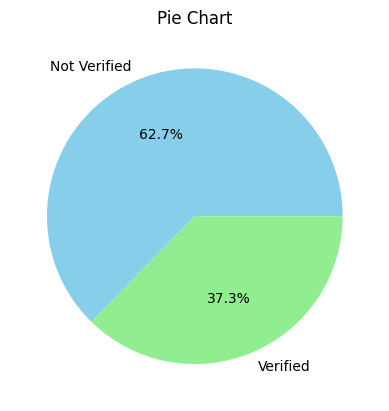

In [ ]:
import matplotlib.pyplot as plt


labels = ['Not Verified', 'Verified']
sizes = [1253,747]

# Plot pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Pie Chart')
plt.show()


In [ ]:
df.shape

(1000, 3)

# Word Cloud

---



In [ ]:
?WordCloud

Object `WordCloud` not found.


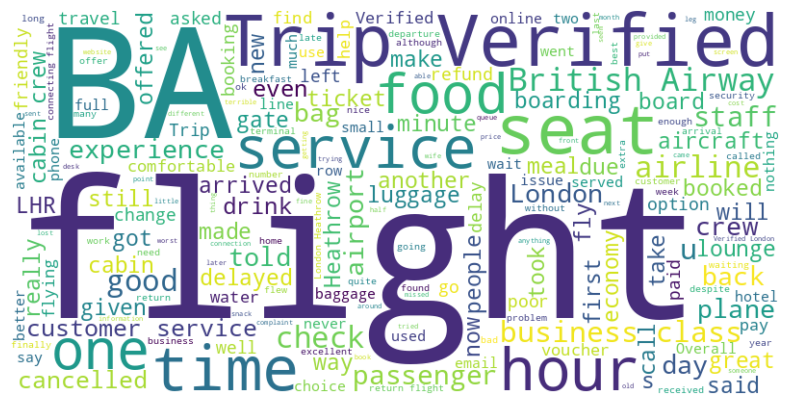

In [ ]:
from wordcloud import WordCloud
# Combine all text from the 'reviews' column into a single string
text = " ".join(review for review in df['reviews'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes for a cleaner look
plt.show()


# Topic Modelling

---



In [ ]:
# Tokenize and clean the text
stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = word_tokenize(text.lower())  # Convert to lowercase and tokenize
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]  # Remove stopwords and non-alphabetic tokens
    return tokens

df['tokenized_reviews'] = df['reviews'].apply(preprocess)

# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(df['tokenized_reviews'])
corpus = [dictionary.doc2bow(review) for review in df['tokenized_reviews']]


In [ ]:
# Train the LDA model
lda_model = LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15)

# Print the topics with the top words
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


(0, '0.008*"flight" + 0.006*"verified" + 0.006*"trip" + 0.006*"crew" + 0.005*"heathrow"')
(1, '0.021*"flight" + 0.017*"ba" + 0.013*"verified" + 0.012*"trip" + 0.009*"crew"')
(2, '0.028*"flight" + 0.016*"ba" + 0.011*"verified" + 0.009*"trip" + 0.009*"service"')


In [ ]:
type(topic)

str

In [ ]:
import pyLDAvis
import pyLDAvis.gensim as gensimvis

# Enable notebook display (if using Jupyter notebook)
pyLDAvis.enable_notebook()

# Step 3: Prepare the visualization
lda_vis = gensimvis.prepare(lda_model,corpus, dictionary)

# Step 4: Display the visualization
pyLDAvis.display(lda_vis)




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)




1.   There are 3 topics
2.   "flight" is mentioned in all the three topics amd 2 of them have highest weight for "flight". This implies that flight is the commonly discussed in all the reviews.
3.   "ba



Words such as "flight" and "ba" are repeated across multiple topics. This happens because those words are broadly relevant to several topics, reflecting to their importance across ***different themes in the dataset***. For example, "flight" might be central to discussions about both service quality and experiences with a particular airline, leading it to appear in multiple topics.

# Sentiment Analysis

---



In [ ]:
import gensim

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install vaderSentiment

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.0 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
analyzer = SentimentIntensityAnalyzer()
sentiments = [analyzer.polarity_scores(doc) for doc in text]

# Step 6: Get topic distribution for each document
document_topics = [lda_model.get_document_topics(bow) for bow in corpus]

# Step 7: Create a DataFrame to aggregate sentiment by topic
data = []

for i, doc in enumerate(document_topics):
    for topic, prob in doc:
        sentiment_score = sentiments[i]['compound']
        data.append({'Document': i, 'Topic': topic, 'Probability': prob, 'Sentiment': sentiment_score})

df = pd.DataFrame(data)

# Step 8: Calculate weighted sentiment score for each topic
df['Weighted_Sentiment'] = df['Probability'] * df['Sentiment']
topic_sentiment = df.groupby('Topic')['Weighted_Sentiment'].mean()

# Output the sentiment for each topic
print(topic_sentiment)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic
0    0.003540
1    0.014209
2    0.012434
Name: Weighted_Sentiment, dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


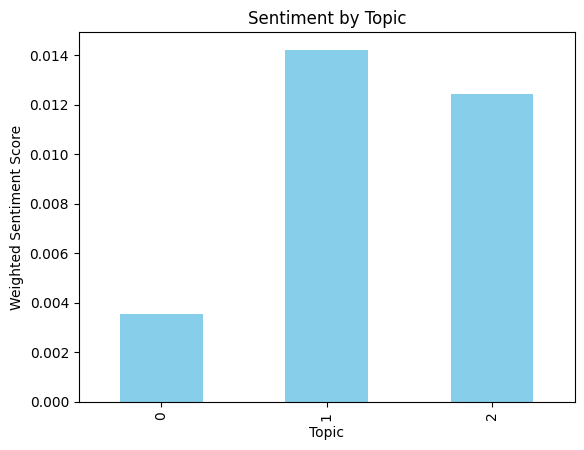

In [ ]:
import matplotlib.pyplot as plt

topic_sentiment.plot(kind='bar', color='skyblue')
plt.title('Sentiment by Topic')
plt.xlabel('Topic')
plt.ylabel('Weighted Sentiment Score')
plt.show()
